In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from random import randint
import scipy.stats as ss
#from scipy.stats import norm, kurtosis, skew
import itertools as itt
import lxml
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Point Estimators

The ability to estimate population parameters using sample data
## Problem Statistical Quality Control
High Way Paving, Inc is a company specializing in residential road surfacing. Many of its clients seek out its specialized product; low noise pavement. Recycled rubber can be added to asphalt mixtures to reduce road noise which appeals to environmentally-conscious clients.

However the viscosity (resistance to flow) must be maintained within very tight limits otherwise it may be too thick or too "watery." The goal of viscosity of 3200.

During the manufacture of each batch of asphalt, the quality control specialist takes 15 samples of the material and tests the viscosity. This also ensures the batch has uniform viscosity.

Points of Note:
- There is no way to test every ounce of asphalt (population). Therefore the comapny must take samples.
- From those samples HWP must then make inferences about the entire batch.
- The inferences made using sample are by definition incomplete; therefore the sample characteristics will always have some error built in.

In [7]:
qc_df = pd.DataFrame({'Specimen': range(1,16), 'Viscosity': [3193,3124,3153,3145,3093,3466,3355,2979,3182,3227,3256,3332,3204,3282,3170]})
qc_df

,Specimen,Viscosity
0,1,3193
1,2,3124
2,3,3153
3,4,3145
4,5,3093
5,6,3466
6,7,3355
7,8,2979
8,9,3182
9,10,3227


Sample mean

$\bar x = 3210.73$

Sample Standard Deviation

$s = 117.61$

Since this is a sample mean we do not expect it to be exactly 3200. But is 3210.72 close enough to our goal to be acceptable?

Does this sample accurately reflect the viscosity parameter of the overall batch (population)

Point estimates are never perfect; they always have an error component. This is commonly referred to as "margin of error" both in statistics and popular culture.

Technically, the error component is expressed as a confidence interval

# Sampling Distributions
Does this sample accurately reflect the viscosity parameter of the overall batch (population)?

The answer is YES, but to prove this lets take multiple samples

9 Samples of Size 15

In [28]:
qc_df = pd.DataFrame({'Sample #': range(1,10), 'Sample_Mean': [3210.73,3150.13,3345.54,3190.67,3217.90,3301.45,3100.72,3413.01,3023.59]})
qc_df

,Sample #,Sample_Mean
0,1,3210.73
1,2,3150.13
2,3,3345.54
3,4,3190.67
4,5,3217.90
5,6,3301.45
6,7,3100.72
7,8,3413.01
8,9,3023.59


In [33]:
bins_df = pd.DataFrame({'.Range': ['2950-3049','3050-3149','3150-3249','3250-3349','3350-3449'], 'Frequency': ['l','l','llll','ll','l']})
bins_df

,.Range,Frequency
0,2950-3049,l
1,3050-3149,l
2,3150-3249,llll
3,3250-3349,ll
4,3350-3449,l


In [31]:
bin1 = qc_df.Sample_Mean[(qc_df['Sample_Mean'] > 2949) & (qc_df['Sample_Mean'] < 3050)]
bin2 = qc_df.Sample_Mean[(qc_df['Sample_Mean'] > 3049) & (qc_df['Sample_Mean'] < 3150)]
bin3 = qc_df.Sample_Mean[(qc_df['Sample_Mean'] > 3149) & (qc_df['Sample_Mean'] < 3250)]
bin4 = qc_df.Sample_Mean[(qc_df['Sample_Mean'] > 3249) & (qc_df['Sample_Mean'] < 3350)]
bin5 = qc_df.Sample_Mean[(qc_df['Sample_Mean'] > 3349) & (qc_df['Sample_Mean'] < 3450)]
bins = [len(bin1),len(bin2),len(bin3),len(bin4),len(bin5)]
bins

[1, 1, 4, 2, 1]

Text(0.5,1,'Viscosity Sampling Distribution')

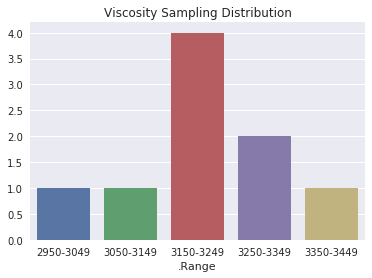

In [36]:
ax = sns.barplot(data = bins_df, x = '.Range', y=bins)
ax.set_title('Viscosity Sampling Distribution')

If we take many random samples from the population each with its own sample mean and then create a distribution based on all those sample means, the mean of that sampling distribution is equal to the mean of the population.

- The expected value of the sampling distribution of $\bar x$ is at best going to be an estimate of $\mu$

# Standard Error of the Mean

High Way Paving, Inc is a company specializing in residential road surfacing. Many of its clients seek out its specialized product; low noise pavement. Recycled rubber can be added to asphalt mixtures to reduce road noise which appeals to environmentally-conscious clients.

However the viscosity (resistance to flow) must be maintained within very tight limits otherwise it may be too thick or too "watery." The goal of viscosity of 3200.

Over several years of production and quality measurements, HWP has determined that the viscosity population mean and standard deviation for the low noise pavement are:

$\mu = 3200$ and $\sigma = 150$

During the manufacture of each batch of asphalt, the quality control specialist takes 15 samples of the material and tests the viscosity. This also ensures the batch has uniform viscosity.

In [37]:
qc_df

,Sample #,Sample_Mean
0,1,3210.73
1,2,3150.13
2,3,3345.54
3,4,3190.67
4,5,3217.90
5,6,3301.45
6,7,3100.72
7,8,3413.01
8,9,3023.59


In [38]:
print('The Mean of the Sampling Distribution Means = ' + str(qc_df['Sample_Mean'].mean()))

The Mean of the Sampling Distribution Means = 3217.0822222222223


Standard Error of the Mean
\begin{equation}
\sigma_x = \frac{\sigma}{\sqrt{n}}
\end{equation}

$\sigma_x$ = standard deviation of $\bar x$

$\sigma$ = standard deviation of population

n = sample size

$\sigma_x = \frac{\sigma}{\sqrt{n}} = \sigma_x = \frac{150}{\sqrt{15}} = 38.7$

Influece of Sample Size

$\sigma_x = \frac{150}{\sqrt{15}} = 38.7$

$\sigma_x = \frac{150}{\sqrt{135}} = 12.9$

$\sigma_x = \frac{150}{\sqrt{500}} = 6.71$

As n increases the STD decreases which narrows the curve around the mean

Normal Distribution


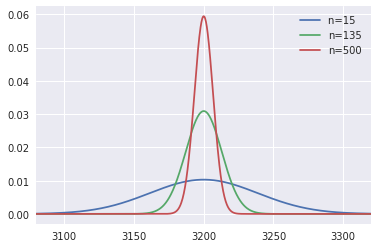

In [88]:
print('Normal Distribution')
x = np.linspace(2000, 5000, 10000)
mu=3200
sigma=.5
y = ss.norm.pdf(x, mu, 38.7)
plt.plot(x,y)
y = ss.norm.pdf(x, mu, 12.9)
plt.plot(x,y)
y = ss.norm.pdf(x, mu, 6.71)
plt.plot(x,y)
plt.xlim(3080,3320)
#plt.ylim(0,1.5)
plt.legend(['n=15 ','n=135','n=500'])

- The standard error is another name for the standard deviation. It is just the standard deviation of the sampling distribution.
- Standard deviation allow us to calculate z-scores and therefore the area (probability) under the curve for certain regions


# Sample mean proximity to $\mu$

- How close is the sample mean $\bar x$  to the population mean $\mu$
- Standard error of the mean is really a standard deviation of the sampling distribution
- Since the standard error of the mean is a standard deviation, we can use that fact to draw a normal distribution using z-scores
- The standard error of the mean is influenced by sample size

Text(0,0.5,'sigma - STD')

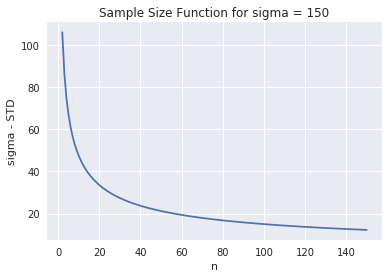

In [97]:
n = range(2,151)
sigma = 150/(np.sqrt(n))
plt.plot(n,sigma)
plt.title('Sample Size Function for sigma = 150')
plt.xlabel('n')
plt.ylabel('sigma - STD')

Increasing sample size reduces the standard error less and less as n -> $\infty$